In [1]:
import numpy as np
import matplotlib.pyplot as plt

from squlearn.feature_map import ChebPQC
from squlearn.expectation_operator import SummedPaulis
from squlearn.qnn.qnnr import QNNRegressor
from squlearn.qnn.loss import SquaredLoss, VarianceLoss
from squlearn.qnn.training import get_variance_fac
from squlearn.optimizers import Adam
from squlearn.util import Executor

In [2]:
executor = Executor("statevector_simulator")

Define parameterized quantum circuit $Q(x,\theta)$

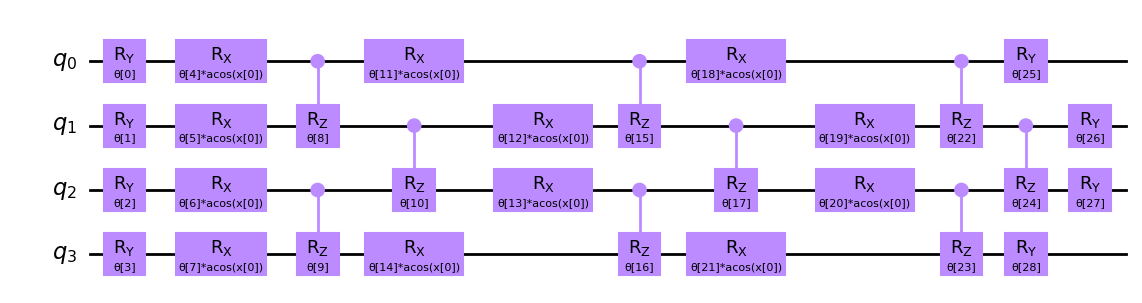

In [3]:
nqubits = 4
number_of_layers = 3
pqc = ChebPQC(nqubits, 1, num_layers=number_of_layers, closed=False)
pqc.draw()

Definition of the cost operator:
$\hat{C}(\vartheta) = \vartheta_0 \hat{I} + \sum_i \vartheta_i \hat{Z}_i $

In [4]:
cost_op = SummedPaulis(nqubits)
print(cost_op)

SummedOp([
  1.0*p[0] * IIII,
  1.0*p[1] * IIIZ,
  1.0*p[2] * IIZI,
  1.0*p[3] * IZII,
  1.0*p[4] * ZIII
])


Example function: $log(x)$

In [5]:
x_space = np.arange(0.1, 0.9, 0.1)
ref_values = np.log(x_space)

np.random.seed(13)
param_ini = np.random.rand(pqc.num_parameters) * 4
param_op_ini = np.ones(cost_op.num_parameters)

Optimization of the regression

In [6]:
ADAM = Adam({"maxiter_total": 100, "maxiter": 25, "lr": 0.1, "log_file": "adam_log.csv"})

reg = QNNRegressor(
    pqc,
    cost_op,
    executor,
    [SquaredLoss, VarianceLoss],
    ADAM,
    param_ini,
    param_op_ini,
    variance=get_variance_fac(0.005, 0.5, 5),
)

reg.fit(x_space, ref_values)

theta [3.11080964 0.95016488 3.29711413 3.86299679 3.89040446 1.81379699
 2.43616985 3.10210606 2.56645338 2.88807292 0.1401461  1.19379788
 0.23404997 3.42824377 1.49141611 2.71939181 1.0251198  1.39032486
 0.03765108 1.43333513 3.79637673 0.87159604 1.27756547 3.67108954
 0.12761467 0.26033815 2.519316   3.49525377 0.03486293 1.
 1.         1.         1.         1.        ]
Current value: 56.394715291045124
theta [3.11080964 0.95016488 3.29711413 3.86299679 3.89040446 1.81379699
 2.43616985 3.10210606 2.56645338 2.88807292 0.1401461  1.19379788
 0.23404997 3.42824377 1.49141611 2.71939181 1.0251198  1.39032486
 0.03765108 1.43333513 3.79637673 0.87159604 1.27756547 3.67108954
 0.12761467 0.26033815 2.519316   3.49525377 0.03486293 1.
 1.         1.         1.         1.        ]


C:\Users\mow\Documents\AutoQML\squlearn\src\squlearn\qnn\training.py:611: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return np.array(


Grad length: 63.9537044289369
grad [  0.52348418   2.60030605  -1.43284283  -1.59848242   6.05881838
   1.05112679 -13.48612921  12.00088504  12.7947583    1.11221222
  -2.73168141  -1.52007302  -5.76641424 -10.16131868   8.1226903
   4.1442705   -6.14762278  -8.8428505   29.26146655  -3.1568228
   2.84476234   4.17214804   0.27668043   0.27595585  -1.00676553
   1.90449589   3.76916289  15.36943246  -6.9512905   31.45129173
  14.19436446  20.2756621   17.91232702  -9.30073157]
theta [ 3.01080966  0.85016488  3.39711412  3.96299679  3.79040446  1.713797
  2.53616985  3.00210606  2.46645338  2.78807293  0.24014609  1.29379788
  0.33404997  3.52824377  1.39141611  2.61939181  1.1251198   1.49032486
 -0.06234892  1.53333513  3.69637673  0.77159604  1.1775655   3.57108958
  0.22761466  0.16033815  2.419316    3.39525377  0.13486293  0.9
  0.9         0.9         0.9         1.1       ]
Current value: 37.241657603706614
theta [ 3.01080966  0.85016488  3.39711412  3.96299679  3.79040446  1.7

In [7]:
reg.set_params(variance=get_variance_fac(0.005, 0.5, 5, offset=ADAM.iteration))
reg.partial_fit(x_space, ref_values)

theta [ 1.95298843  1.8692434   2.45183371  3.54459277  2.97691132  0.16972455
  2.69545847  2.06347475  1.59407161  2.385522    0.65556835  1.08977929
  0.43418123  3.35490121  0.87505652  2.02907341  1.23783349  2.15370544
 -0.94735206  1.89104315  2.62407527  1.07963002  0.66348406  2.76326316
  0.66474324  1.17241606  1.77517219  2.71349385  0.27682367 -0.53285805
  0.36025379  0.46420681 -0.23889801  0.87466231]
Current value: 0.37899543175258776
theta [ 1.95298843  1.8692434   2.45183371  3.54459277  2.97691132  0.16972455
  2.69545847  2.06347475  1.59407161  2.385522    0.65556835  1.08977929
  0.43418123  3.35490121  0.87505652  2.02907341  1.23783349  2.15370544
 -0.94735206  1.89104315  2.62407527  1.07963002  0.66348406  2.76326316
  0.66474324  1.17241606  1.77517219  2.71349385  0.27682367 -0.53285805
  0.36025379  0.46420681 -0.23889801  0.87466231]
Grad length: 1.683381755745998
grad [ 0.0064269  -0.38689054  0.22708702  0.19662105  0.03530188  0.01877463
  0.15916649 -

In [8]:
reg.set_params(variance=get_variance_fac(0.005, 0.5, 5, offset=ADAM.iteration))
reg.partial_fit(x_space, ref_values)

theta [ 1.85864558  2.40076555  2.16467602  3.3546674   2.95340035 -0.25131017
  2.61520484  1.95462771  1.53564032  2.14224606  0.40873856  0.94635988
  0.28752893  3.06449968  0.79523728  2.01949843  1.23289095  2.32095989
 -1.02290872  1.87518783  2.36921484  1.1406508   0.48471792  2.61125097
  0.41732844  1.22931963  1.91220113  2.61020691 -0.13337391 -0.66023726
  0.50587425  0.42831288 -0.29429597  0.7918703 ]
Current value: 0.11161426986382986
theta [ 1.85864558  2.40076555  2.16467602  3.3546674   2.95340035 -0.25131017
  2.61520484  1.95462771  1.53564032  2.14224606  0.40873856  0.94635988
  0.28752893  3.06449968  0.79523728  2.01949843  1.23289095  2.32095989
 -1.02290872  1.87518783  2.36921484  1.1406508   0.48471792  2.61125097
  0.41732844  1.22931963  1.91220113  2.61020691 -0.13337391 -0.66023726
  0.50587425  0.42831288 -0.29429597  0.7918703 ]
Grad length: 0.5142241522620359
grad [ 0.02091997  0.06354431 -0.17211613  0.13792632 -0.0036419   0.00173493
  0.04113798 

In [9]:
reg.set_params(variance=get_variance_fac(0.005, 0.5, 5, offset=ADAM.iteration))
reg.partial_fit(x_space, ref_values)

theta [ 2.02892481  2.41314433  2.29191534  3.30148067  2.95384282 -0.47565824
  2.60238755  1.91671954  1.5468213   1.92740118  0.37863131  1.06483539
  0.34022187  3.02347393  0.73332877  2.00063728  1.38171715  2.33064224
 -1.0241354   1.94045476  2.29353014  1.14821404  0.6367382   2.63237058
  0.61106875  1.21910375  1.94733491  2.59805342 -0.19674736 -0.6803016
  0.54331957  0.4982141  -0.36536771  0.75580924]
Current value: 0.05933035432412016
theta [ 2.02892481  2.41314433  2.29191534  3.30148067  2.95384282 -0.47565824
  2.60238755  1.91671954  1.5468213   1.92740118  0.37863131  1.06483539
  0.34022187  3.02347393  0.73332877  2.00063728  1.38171715  2.33064224
 -1.0241354   1.94045476  2.29353014  1.14821404  0.6367382   2.63237058
  0.61106875  1.21910375  1.94733491  2.59805342 -0.19674736 -0.6803016
  0.54331957  0.4982141  -0.36536771  0.75580924]
Grad length: 0.18293442268717713
grad [-0.00782773  0.02333376 -0.06077055  0.04993472 -0.00038514  0.00535291
  0.01759074  

In [10]:
print("Result Param:", reg.param)
print("Result ParamOp:", reg.param_op)

Result Param: [ 2.14072305  2.41188367  2.36246405  3.29045553  2.94550894 -0.53457555
  2.60881096  1.92270585  1.562211    1.82635782  0.37142308  1.10269349
  0.3627689   3.02851541  0.72523964  1.98997442  1.43337714  2.31838183
 -1.01909566  1.9604151   2.27963538  1.18195303  0.68919935  2.65531773
  0.70353443  1.18626751  1.92877923  2.5931212  -0.2002607 ]
Result ParamOp: [-0.688705    0.54255727  0.51404578 -0.39663934  0.71535574]


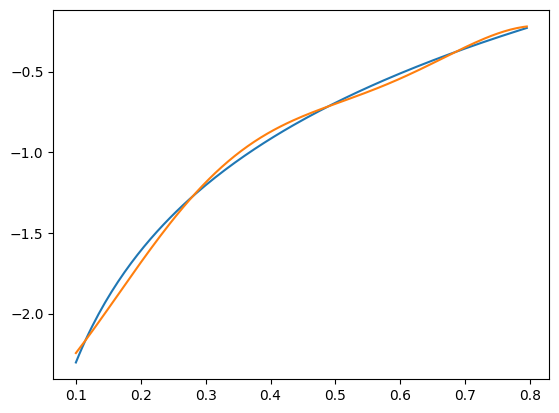

In [11]:
x = np.arange(np.min(x_space), np.max(x_space), 0.005)
y = reg.predict(x)
plt.plot(x, np.log(x))
plt.plot(x, y)